# Numpy for Finance 03 - 기본 통계량과 시뮬레이션

<img width="320" src="http://i.imgur.com/1Z9bz5V.jpg">


### 2018 FinanceData.KR

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams["axes.grid"] = True

# 소트

In [2]:
import numpy as np

ar = np.random.randint(0,10,5)
ar

array([7, 1, 4, 8, 8])

In [3]:
ar.sort()
ar

array([1, 4, 7, 8, 8])

# 소트 - 분위수 구하기
상위 25%가 되려면 몇 점 이상이어야 할까?

In [4]:
a = np.random.randn(100) * 100 #임의로 100개의 점수
a.sort()
a[int(0.75 * len(a))]

54.53710382137593

# 통계량
* np.mean(ar), ar.mean(): 산술평균
* ar.mean(axis=1): 한단계 낮은 차원의 배열 반환
* arr.sum(0): 0은 축

# 2D 배열
* ar.cumsum(0)
* ar.cumprod(1)

In [5]:
ar = np.arange(1,10).reshape(3,3)
ar

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
ar.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45])

In [7]:
ar.cumsum(0)

array([[ 1,  2,  3],
       [ 5,  7,  9],
       [12, 15, 18]])

In [8]:
ar.cumsum(1)

array([[ 1,  3,  6],
       [ 4,  9, 15],
       [ 7, 15, 24]])

# 기본 통계량
* sum, mean, std, var, min, max, argmin argmax, cumsum, cumprod

In [9]:
ar = np.arange(1,21).reshape(4,5)
print(ar)

p = ar.mean()
print("ar.mean() ", p)

p = ar.mean(axis=0)
print("ar.mean(axis=0) ", p)

p = ar.mean(axis=1)
print("ar.mean(axis=1) ", p)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]
ar.mean()  10.5
ar.mean(axis=0)  [ 8.5  9.5 10.5 11.5 12.5]
ar.mean(axis=1)  [ 3.  8. 13. 18.]


# 정규화 (normalize)
시작 행을 0으로 만들기 (초기값 대비 등락 관찰)

In [10]:
a = np.array( [[10,  20, 30], [15, 48, 30], [5, 4, 60]] )
a

array([[10, 20, 30],
       [15, 48, 30],
       [ 5,  4, 60]])

In [11]:
n = a/a[0, :] - 1
n

array([[ 0. ,  0. ,  0. ],
       [ 0.5,  1.4,  0. ],
       [-0.5, -0.8,  1. ]])

# 랜덤 배열 생성

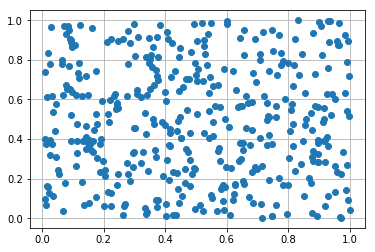

In [12]:
import matplotlib.pyplot as plt

# 랜덤 숫자로 채워진 ndarray를 생성
ar_x = np.random.rand(400)
ar_y = np.random.rand(400)
plt.plot(ar_x, ar_y, 'o')
plt.show()

# 랜덤 배열 생성 (정규분포)

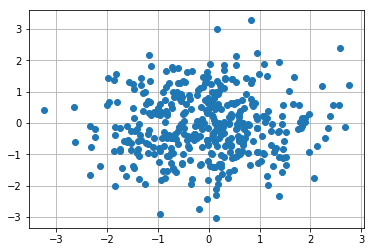

In [13]:
ar_x = np.random.randn(400)
ar_y = np.random.randn(400)
plt.plot(ar_x, ar_y, 'o')
plt.show()

# 시뮬레이션 – 베르누이 실행

In [14]:
import numpy as np
from numpy.random import randint

steps = 100
movements = randint(0, 2, size=steps)
print (movements)

[0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1
 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0]


# 랜덤워크 (Random walk)
* 이전 가격대비 -1, 0, 1 사이에서 움직인다고 하자.
* 각각을 가격 (상승, 동일, 하락)으로 생각할 수 있다.

In [15]:
plt.rcParams["figure.figsize"] = (14,4)

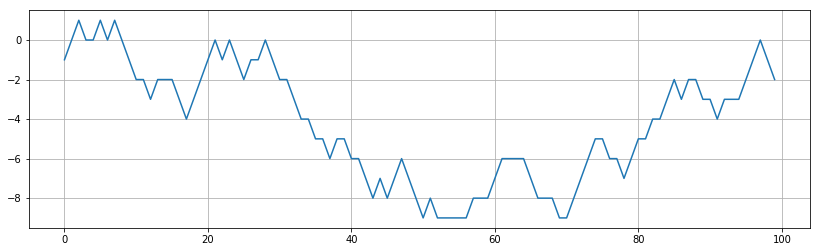

In [16]:
steps = np.random.randint(-1, 2, size=100)
walks = steps.cumsum()
plt.plot(walks)
plt.show()

# 랜덤워크 (다수 종목)
100 walk를 10개 종목에 대해 실행


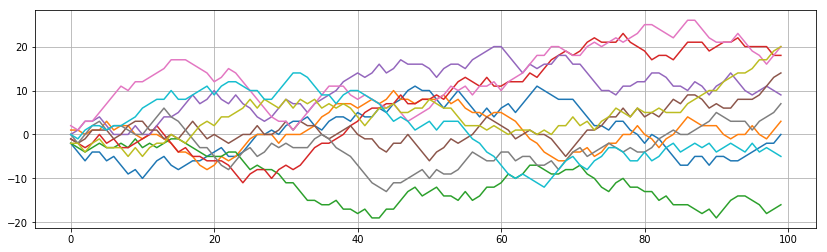

In [17]:
t = np.random.randint(-2, 3, size=(100,10))
walks = t.cumsum(0)
plt.plot(walks)
plt.show()

# 표준 정규분포 랜덤워크

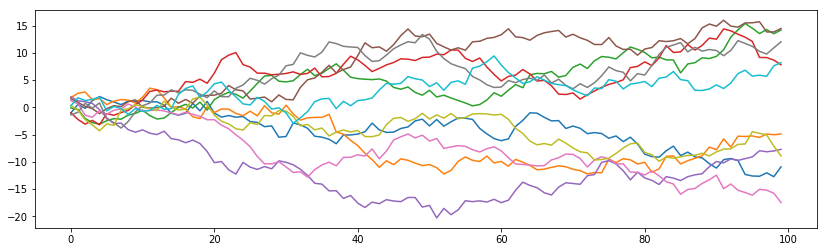

In [18]:
data = np.random.standard_normal((100, 10))

plt.plot(data.cumsum(axis=0))
plt.grid()
plt.show()

# 간단한 가격 생성 시뮬레이션
* 120 일간
* 하루에 +30%, -30% 무작위 등락

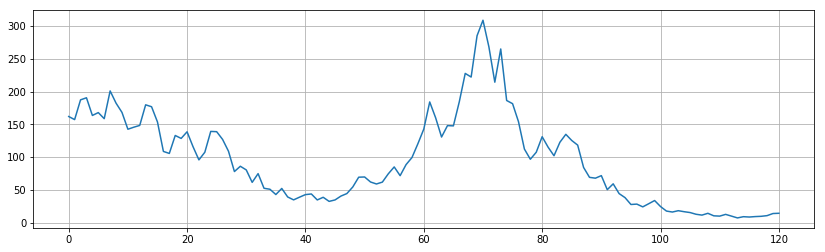

In [19]:
import random
import numpy as np
 
days = 120

def gen_prices():
    prices = [np.random.randint(5, 1000)]
    for i in range(days):
        change = np.random.uniform(-0.3, 0.3)
        prices.append(prices[-1]  + prices[-1] * change)
    return prices

plt.plot(gen_prices())
plt.show()

# 랜덤워크 가격 생성
* 초기가격(ini_price) = 100
* n 종목, 투자일수(tries) = 100
* 변동성(volatility) = 0.005 (0.5%)

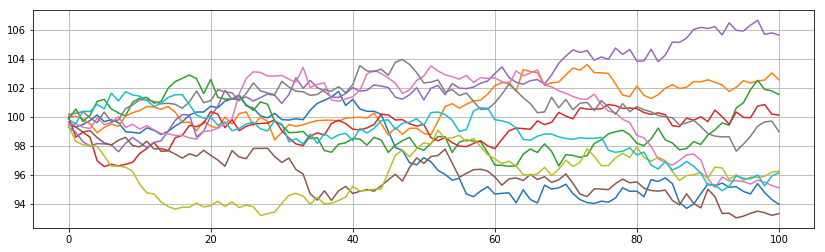

In [20]:
def random_walk(ini_price = 100, n = 10, tries = 100, volatility = 0.005):
    r = np.random.normal(size=(tries+1, n)) * volatility
    return ini_price * np.exp(np.cumsum(r, axis=0))

plt.plot(random_walk(n=10))
plt.show() 

# 정규분포 
random.normal()

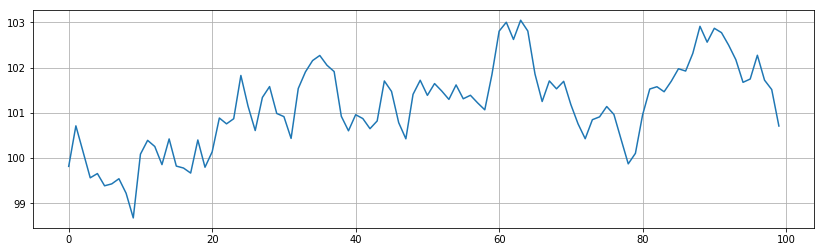

In [21]:
ini_price = 100.0
days = 100
random_numbers = np.random.normal(size=days) * 0.005
multipliers = 1 + random_numbers

prices = ini_price * np.cumprod(multipliers)
plt.plot(prices)
plt.show()

# 수익률

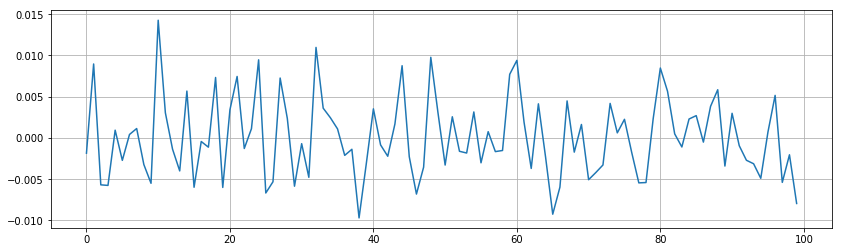

In [22]:
returns = multipliers - 1
plt.plot(returns)

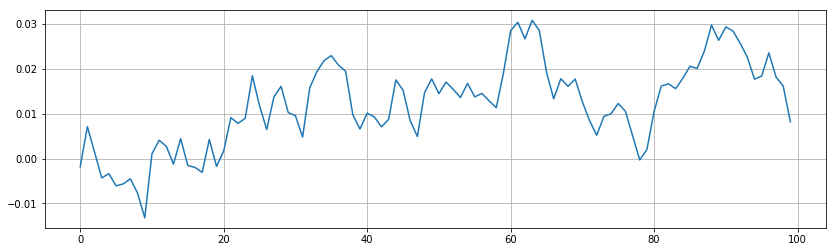

In [23]:
plt.plot(returns.cumsum())

# 리뷰
* 소트, 분위수 구하기 (값의 범위를 위치로 환산)
* 랜덤 넘버 np.random.normal(size=100)
* 랜덤 워크와 가격 시뮬레이션
* 정규화  a/a[0, :] - 1

----
### 2018 FinanceData http://fb.com/financedata http://financedata.github.com